In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

#This dataset seems to work the best
data = pd.read_csv('/home/ahmed/projects/cs301/project/intel_celeron_processors_v1_6.csv')

#These two don't
data2 = pd.read_csv('/home/ahmed/projects/cs301/project/intel_pentium_processors_v1_6.csv')
data3 = pd.read_csv('/home/ahmed/projects/cs301/project/intel_core_processors_v1_6.csv')


def generate_types(dataset,column):
    unique = dataset[column].unique()
    print(unique)

#columns to use
# 'Lithography(nm)' 
# 'TDP(W)'
# 'Base Freq.(GHz)'
# 'Cache(MB)'
# 'Cores'
# 'Threads'
#
#



#Model 1: Lithography + TDP + Threads = Base Freq: 1.8055965003592949 [-0.03018577  0.03035444  0.00081481], R^2 = 0.7102385648175972

#Model 2: Lithography + TDP + Cache = Base Freq: 1.5052317661663703 [-0.00757291  0.02570344 -0.02235361], R^2  = 0.6696070538795138


dataset = data
featurex1 = 'Lithography(nm)'
featurex2 = 'TDP(W)'
featurex3 = 'Threads'
#what we are trying to predict
featurey1 = 'Base Freq.(GHz)'


data_processed = dataset[[featurex1,featurex2,featurex3,featurey1]]
data_processed = data_processed.dropna()
X = data_processed[[featurex1,featurex2,featurex3]]
y = data_processed[featurey1]

X = X.dropna()

y = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=43)


model = linear_model.LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_, model.coef_)

y_predicted = model.predict(X_test)
score = r2_score(y_test,y_predicted)
print(score)


#helper methods
#generate_types(data, 'Base Freq.(GHz)')
#generate_types(data, 'TDP(W)')
#generate_types(data, 'Threads')

1.8055965003592949 [-0.03018577  0.03035444  0.00081481]
0.7102385648175972


2D Graph

Text(0.5, 1.0, 'Threads')

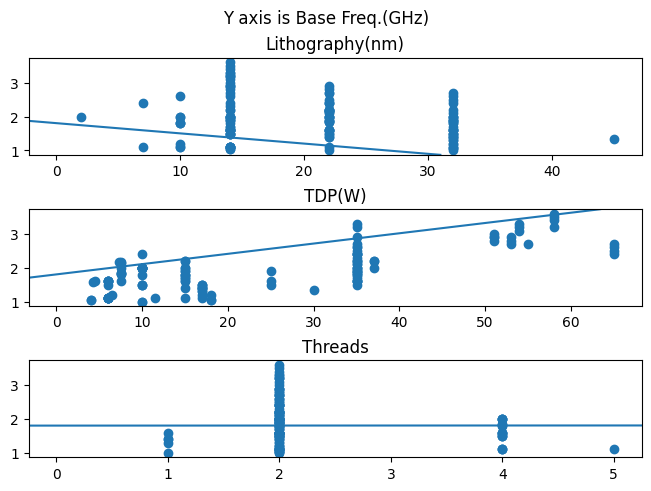

In [107]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(3, constrained_layout=True)
fig.suptitle('Y axis is ' + featurey1)
axs[0].scatter(X_train[featurex1],y_train)
axs[0].axline((0,model.intercept_), slope=model.coef_[0])
axs[0].set_title(featurex1)
axs[1].scatter(X_train[featurex2],y_train)
axs[1].axline((0,model.intercept_), slope=model.coef_[1])
axs[1].set_title(featurex2)
axs[2].scatter(X_train[featurex3],y_train)
axs[2].axline((0,model.intercept_), slope=model.coef_[2])
axs[2].set_title(featurex3)